
# Importing Libraries

This cell imports all the necessary libraries for the task. It includes TensorFlow and Keras for deep learning, scikit-learn for PCA, clustering and metrics, numpy for numerical operations, matplotlib for plotting, time for measuring execution time and pandas for creating dataframes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import time
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow import keras as ks

# Define the number of clusters
n_clusters = 10

# Loading the Fashion-MNIST Dataset

This cell loads the Fashion-MNIST dataset using the load_data() function from tensorflow.keras.datasets.fashion_mnist. It returns two tuples: one for the training set (images and labels) and one for the test set (images and labels).

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizing Pixel Values

This cell normalizes the pixel values of both the training and test images by dividing them by 255.0. This scales the pixel values to be between 0 and 1, which is a common preprocessing step for image data in machine learning.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flattening the Images

This cell flattens the 28x28 pixel images into a 1D array of 784 pixels for both the training and test sets. This is necessary for algorithms like PCA and some clustering algorithms that expect a 1D input.

In [ ]:
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# Clustering with Mini-Batch K-Means and GMM on Raw Data and Evaluation

This cell performs clustering on the raw (flattened) test data using Mini-Batch K-Means and Gaussian Mixture Model (GMM). It then calculates and stores the execution time for each clustering algorithm, as well as the Calinski-Harabasz index, Davies-Bouldin index, and Silhouette score to evaluate the clustering performance.
**Additionally, this cell initializes the main Pandas DataFrame to store all results from subsequent clustering experiments.**

In [ ]:
# Mini-Batch K-Means Clustering on Raw Data

start_execution_mb_kmeans_raw = time.time() # Use a more specific variable name
mini_batch_kmeans_raw = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init=3) # Use a more specific variable name
mini_batch_kmeans_raw.fit(train_images) # Fit on training data
mini_batch_kmeans_raw_labels = mini_batch_kmeans_raw.predict(test_images) # Predict on test data
end_execution_mb_kmeans_raw = time.time()
exec_time_mb_raw = end_execution_mb_kmeans_raw - start_execution_mb_kmeans_raw

# Evaluate Mini-Batch K-Means on Raw Data
calinski_harabasz_mb_raw = calinski_harabasz_score(test_images, mini_batch_kmeans_raw_labels)
davies_bouldin_mb_raw = davies_bouldin_score(test_images, mini_batch_kmeans_raw_labels)
silhouette_mb_raw = silhouette_score(test_images, mini_batch_kmeans_raw_labels)
num_clusters_mb_raw = len(set(mini_batch_kmeans_raw_labels))

# Gaussian Mixture Model (GMM) Clustering on Raw Data
start_execution_gmm_raw = time.time() # Use a more specific variable name
gmm_raw = GaussianMixture(n_components=n_clusters, random_state=42) # Use a more specific variable name
gmm_raw.fit(train_images) # Fit on training data
gmm_raw_labels = gmm_raw.predict(test_images) # Predict on test data
end_execution_gmm_raw = time.time()
exec_time_gmm_raw = end_execution_gmm_raw - start_execution_gmm_raw

# Evaluate GMM on Raw Data
calinski_harabasz_gmm_raw = calinski_harabasz_score(test_images, gmm_raw_labels)
davies_bouldin_gmm_raw = davies_bouldin_score(test_images, gmm_raw_labels)
silhouette_gmm_raw = silhouette_score(test_images, gmm_raw_labels)
num_clusters_gmm_raw = len(set(gmm_raw_labels))

# --- Create and Populate Pandas DataFrame with Raw Results ---
df = pd.DataFrame(columns=[
    'Dimensionality reduction technique name',
    'Clustering algorithm',
    'Training time for the dim. red. tech. in seconds', # For Raw, this is 0
    'Execution time for the clustering tech. in seconds',
    'Number of suggested clusters', # Should be n_clusters (10)
    'Calinski-Harabasz index',
    'Davies-Bouldin index',
    'Silhouette score'
])

# Add results for Mini-Batch K-Means on Raw Data
raw_row_mb_kmeans = {
    'Dimensionality reduction technique name': 'Raw',
    'Clustering algorithm': 'Mini-Batch K-means',
    'Training time for the dim. red. tech. in seconds': 0.0, # Raw data doesn't require training time for dim reduction
    'Execution time for the clustering tech. in seconds': exec_time_mb_raw,
    'Number of suggested clusters': num_clusters_mb_raw,
    'Calinski-Harabasz index': calinski_harabasz_mb_raw,
    'Davies-Bouldin index': davies_bouldin_mb_raw,
    'Silhouette score': silhouette_mb_raw
}
df.loc[len(df)] = raw_row_mb_kmeans

# Add results for GMM on Raw Data
raw_row_gmm = {
    'Dimensionality reduction technique name': 'Raw',
    'Clustering algorithm': 'GMM',
    'Training time for the dim. red. tech. in seconds': 0.0, # Raw data doesn't require training time for dim reduction
    'Execution time for the clustering tech. in seconds': exec_time_gmm_raw,
    'Number of suggested clusters': num_clusters_gmm_raw,
    'Calinski-Harabasz index': calinski_harabasz_gmm_raw,
    'Davies-Bouldin index': davies_bouldin_gmm_raw,
    'Silhouette score': silhouette_gmm_raw
}
df.loc[len(df)] = raw_row_gmm

# Optional: Print the dataframe after adding Raw results
print("DataFrame after Raw Results:")
print(df)

DataFrame after Raw Results:
  Dimensionality reduction technique name Clustering algorithm  \
0                                     Raw   Mini-Batch K-means   
1                                     Raw                  GMM   

   Training time for the dim. red. tech. in seconds  \
0                                               0.0   
1                                               0.0   

   Execution time for the clustering tech. in seconds  \
0                                           2.502627    
1                                        1669.006883    

   Number of suggested clusters  Calinski-Harabasz index  \
0                            10              1208.793201   
1                            10               718.156123   

   Davies-Bouldin index  Silhouette score  
0              2.079555          0.128685  
1              2.999820          0.102794  


# Splitting Training Data into Training and Validation Sets

This cell splits the original training data into two parts: a training set and a validation set. The validation set is used during the training of neural network models (like the Stacked Autoencoder) to monitor performance and prevent overfitting. The `train_test_split` function from scikit-learn is used to perform the split.

In [ ]:
# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Print shapes to verify the split (optional)
print("Shape of training images:", train_images.shape)
print("Shape of validation images:", val_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of validation labels:", val_labels.shape)

Shape of training images: (48000, 784)
Shape of validation images: (12000, 784)
Shape of training labels: (48000,)
Shape of validation labels: (12000,)


# Flattening Training, Validation, and Test Images

This cell flattens the 28x28 pixel images into a 1D array of 784 pixels for the training, validation, and test sets. This is necessary for algorithms like PCA and some clustering algorithms that expect a 1D input.

In [ ]:
# Flatten the images for PCA and other algorithms
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Print shapes to verify flattening (optional)
print("Shape of flattened training images:", train_images_flat.shape)
print("Shape of flattened validation images:", val_images_flat.shape)
print("Shape of flattened test images:", test_images_flat.shape)

Shape of flattened training images: (48000, 784)
Shape of flattened validation images: (12000, 784)
Shape of flattened test images: (10000, 784)


# Applying Principal Component Analysis (PCA)

This cell applies PCA to reduce the dimensionality of the flattened training, validation, and test images. PCA is used to transform the data into a lower-dimensional space while preserving the most important information. The number of components is set to 50. The training time for PCA is also calculated.

In [ ]:
# --- Apply PCA for Dimensionality Reduction ---
start_training_pca = time.time() # Start timing PCA training
pca = PCA(n_components=50)      # Initialize PCA with 50 components
train_images_pca = pca.fit_transform(train_images_flat) # Fit PCA on training data and transform it
val_images_pca = pca.transform(val_images_flat)       # Transform validation data
test_images_pca = pca.transform(test_images_flat)      # Transform test data
end_training_pca = time.time()   # End timing PCA training

training_time_pca = end_training_pca - start_training_pca # Calculate PCA training time

# Print PCA training time
print(f"PCA Training Time: {training_time_pca} seconds")
print(f"Shape of train_images_pca: {train_images_pca.shape}")
print(f"Shape of val_images_pca: {val_images_pca.shape}")
print(f"Shape of test_images_pca: {test_images_pca.shape}")

PCA Training Time: 1.986382007598877 seconds
Shape of train_images_pca: (48000, 50)
Shape of val_images_pca: (12000, 50)
Shape of test_images_pca: (10000, 50)


# Displaying Original and Reconstructed Images (after PCA)

This cell selects a few random images from each class of the training set and displays both the original and their reconstructed versions after applying PCA.This helps to visualize the effect of dimensionality reduction and the information retained by PCA.

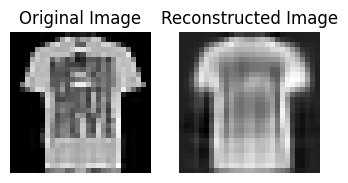

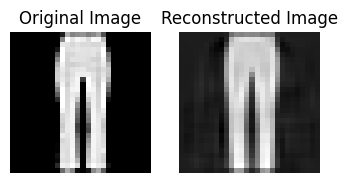

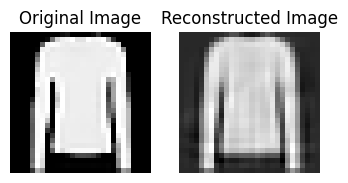

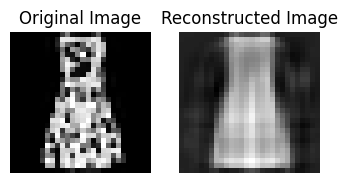

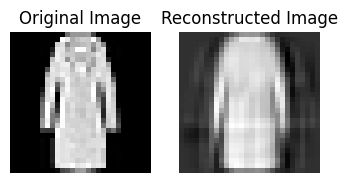

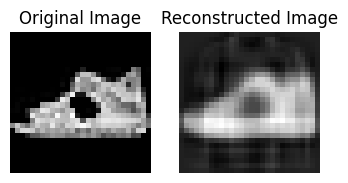

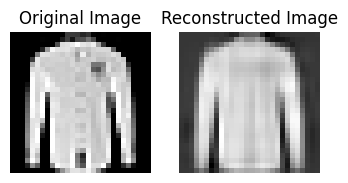

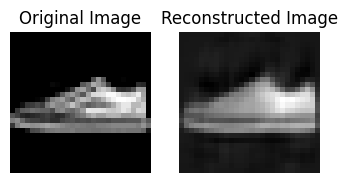

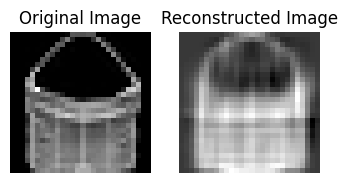

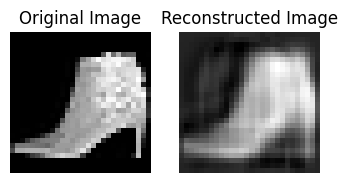

In [ ]:
# --- Display Original and Reconstructed Images (after PCA) ---
num_classes = 10           # Number of classes in Fashion-MNIST
samples_per_class = 1      # Number of samples to visualize per class
selected_images = []

for i in range(num_classes):
    indices = np.where(train_labels == i)[0]  # Get indices of images from class i
    selected_index = np.random.choice(indices, samples_per_class, replace=False) # Randomly select one image
    selected_images.extend(selected_index)

for index in selected_images:
    original_image = train_images[index].reshape(28, 28) # Reshape to original image dimensions

    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    if 'pca' in locals(): # Check if PCA was applied (to avoid errors if running this cell independently)
        reconstructed_image = pca.inverse_transform(train_images_pca[index]).reshape(28, 28) # Reconstruct image
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title("Reconstructed Image")
        plt.axis('off')
    else:
        plt.subplot(1, 2, 2)
        plt.imshow(original_image, cmap='gray') # If no PCA, show original again
        plt.title("No PCA")
        plt.axis('off')

    plt.show()

# PCA Scatter Plot Visualization

This cell generates a scatter plot to visualize the training data in the reduced 2-dimensional space defined by the first two principal components (PC1 and PC2) obtained from PCA. The plot is color-coded by the class labels to show how the different classes are distributed in the reduced space. This visualization can provide insights into the effectiveness of PCA for dimensionality reduction and the separability of the classes.

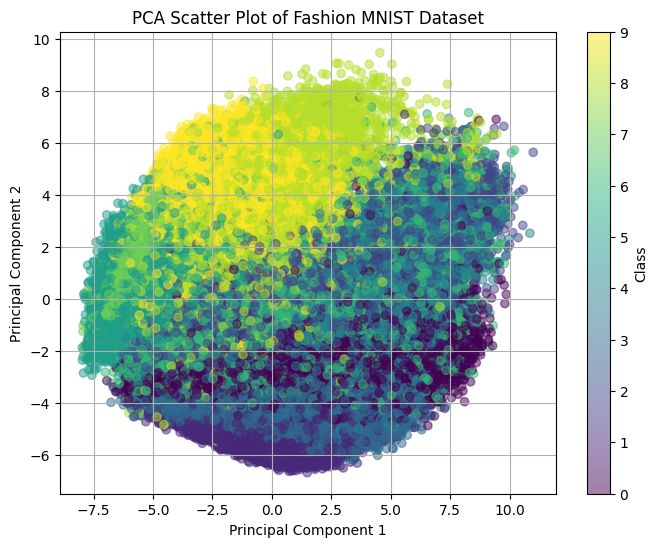

In [ ]:
# --- PCA Scatter Plot Visualization ---
pc1 = train_images_pca[:, 0] # Get the first principal component
pc2 = train_images_pca[:, 1] # Get the second principal component

plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=train_labels, cmap='viridis', alpha=0.5) # Create the scatter plot
plt.title('PCA Scatter Plot of Fashion MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class') # Add a colorbar to indicate the classes
plt.grid(True)
plt.show()

# Preparing Test Data after PCA

This cell prepares the test data by flattening it and then transforming it using the PCA model that was previously trained on the training data. This ensures that the test data is in the same reduced-dimensional space as the training data before it is used for clustering evaluation.

In [ ]:
# --- Prepare Test Data after PCA ---
test_images_flat = test_images.reshape(test_images.shape[0], -1) # Flatten the test images
test_images_pca = pca.transform(test_images_flat)               # Transform the test images using the trained PCA model

# Print shape of test images after PCA (for verification)
print(f"Test images shape after PCA: {test_images_pca.shape}")

Test images shape after PCA: (10000, 50)


# Mini-Batch K-Means Clustering on PCA-transformed Test Data

This cell applies the Mini-Batch K-Means clustering algorithm to the test data that has been transformed using PCA. It fits the Mini-Batch K-Means model on the PCA-transformed training data and then predicts the cluster labels for the PCA-transformed test data. The execution time for the clustering process is also calculated and printed.

In [ ]:
# --- Mini-Batch K-Means Clustering on PCA-transformed Test Data ---
start_execution_mb_kmeans = time.time()
mini_batch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42, n_init=3)

mini_batch_kmeans.fit(train_images_pca) # Fit on PCA-transformed training data

mini_batch_kmeans_labels = mini_batch_kmeans.predict(test_images_pca) # Predict on PCA-transformed test data
end_execution_mb_kmeans = time.time()

exec_time_mb = end_execution_mb_kmeans - start_execution_mb_kmeans
print(f"Execution Time for MiniBatch KMeans: {exec_time_mb} seconds")

print("Mini-Batch K-means Clustering Labels for Test Data:")
print(mini_batch_kmeans_labels)

Execution Time for MiniBatch KMeans: 0.15161490440368652 seconds
Mini-Batch K-means Clustering Labels for Test Data:
[3 7 4 ... 1 4 8]


# Gaussian Mixture Model (GMM) Clustering on PCA-transformed Test Data

This cell applies the Gaussian Mixture Model (GMM) clustering algorithm to the test data that has been transformed using PCA. It fits the GMM model on the PCA-transformed training data and then predicts the cluster labels for the PCA-transformed test data. The execution time for the clustering process is also calculated and printed.

In [ ]:
# --- Gaussian Mixture Model (GMM) Clustering on PCA-transformed Test Data ---
start_execution_gmm = time.time()
gmm = GaussianMixture(n_components=10, random_state=42)

gmm.fit(train_images_pca)  # Fit on PCA-transformed training data

gmm_labels = gmm.predict(test_images_pca) # Predict on PCA-transformed test data
end_execution_gmm = time.time()

exec_time_gmm = end_execution_gmm - start_execution_gmm
print(f"Execution Time for GMM: {exec_time_gmm} seconds")

print("GMM Clustering Labels for Test Data:")
print(gmm_labels)

Execution Time for GMM: 35.70093369483948 seconds
GMM Clustering Labels for Test Data:
[4 2 7 ... 2 7 4]


# Evaluating Mini-Batch K-Means Clustering on PCA-transformed Data

This cell calculates the Calinski-Harabasz index, Davies-Bouldin index, and Silhouette score to evaluate the performance of Mini-Batch K-Means clustering on the PCA-transformed test data. It also determines the number of clusters found by the algorithm. These metrics provide insights into the quality and separation of the clusters.

In [ ]:
# --- Evaluate Mini-Batch K-Means Clustering on PCA-transformed Data ---
calinski_harabasz_mini_batch_kmeans = calinski_harabasz_score(test_images_pca, mini_batch_kmeans_labels)

davies_bouldin_mini_batch_kmeans = davies_bouldin_score(test_images_pca, mini_batch_kmeans_labels)

silhouette_mini_batch_kmeans = silhouette_score(test_images_pca, mini_batch_kmeans_labels)

num_clusters_mini_batch_kmeans = len(set(mini_batch_kmeans_labels))

print("Calinski-Harabasz Index for MiniBatch KMeans:", calinski_harabasz_mini_batch_kmeans)
print("Davies-Bouldin Index for MiniBatch KMeans:", davies_bouldin_mini_batch_kmeans)
print("Silhouette Score for MiniBatch KMeans:", silhouette_mini_batch_kmeans)
print("Number of Clusters for MiniBatch KMeans:", num_clusters_mini_batch_kmeans)

Calinski-Harabasz Index for MiniBatch KMeans: 1730.5007959252364
Davies-Bouldin Index for MiniBatch KMeans: 1.7360396707096608
Silhouette Score for MiniBatch KMeans: 0.17575644453182712
Number of Clusters for MiniBatch KMeans: 10


# Evaluating Gaussian Mixture Model (GMM) Clustering on PCA-transformed Data

This cell calculates the Calinski-Harabasz index, Davies-Bouldin index, and Silhouette score to evaluate the performance of Gaussian Mixture Model (GMM) clustering on the PCA-transformed test data. It also determines the number of clusters found by the algorithm. These metrics provide insights into the quality and separation of the clusters obtained by GMM.

In [ ]:
# --- Evaluate Gaussian Mixture Model (GMM) Clustering on PCA-transformed Data ---
calinski_harabasz_gmm = calinski_harabasz_score(test_images_pca, gmm_labels)

davies_bouldin_gmm = davies_bouldin_score(test_images_pca, gmm_labels)

silhouette_gmm = silhouette_score(test_images_pca, gmm_labels)

num_clusters_gmm = len(set(gmm_labels))

print("Calinski-Harabasz Index for GMM:", calinski_harabasz_gmm)
print("Davies-Bouldin Index for GMM:", davies_bouldin_gmm)
print("Silhouette Score for GMM:", silhouette_gmm)
print("Number of Clusters for GMM:", num_clusters_gmm)

Calinski-Harabasz Index for GMM: 1051.6351394206315
Davies-Bouldin Index for GMM: 2.588150344430489
Silhouette Score for GMM: 0.10016985720964032
Number of Clusters for GMM: 10


# Creating and Adding Rows to DataFrame for PCA Results

This cell creates dictionaries (rows) to store the evaluation metrics and timing information for the Mini-Batch K-Means and Gaussian Mixture Model clustering algorithms when applied after PCA dimensionality reduction. It then appends these rows to the DataFrame for comparison with the results obtained using raw data.

In [ ]:
# --- Create and Add Rows to DataFrame for PCA Results ---

# Row for GMM after PCA
pca_gmm_row = {
    'Dimensionality reduction technique name': 'PCA',
    'Clustering algorithm': 'Gaussian Mixture',
    'Training time for the dim. red. tech. in seconds': training_time_pca,  # Corrected variable name
    'Execution time for the clustering tech. in seconds': exec_time_gmm,
    'Number of suggested clusters': num_clusters_gmm,
    'Calinski–Harabasz index': calinski_harabasz_gmm,
    'Davies–Bouldin index': davies_bouldin_gmm,  # Corrected: Was silhouette_gmm
    'Silhouette score': silhouette_gmm
}

# Row for Mini-Batch K-means after PCA
pca_mb_row = {
    'Dimensionality reduction technique name': 'PCA',
    'Clustering algorithm': 'Mini-Batch K-means',
    'Training time for the dim. red. tech. in seconds': training_time_pca,  # Corrected variable name
    'Execution time for the clustering tech. in seconds': exec_time_mb,
    'Number of suggested clusters': num_clusters_mini_batch_kmeans,
    'Calinski–Harabasz index': calinski_harabasz_mini_batch_kmeans,
    'Davies–Bouldin index': davies_bouldin_mini_batch_kmeans,  # Corrected: Was silhouette_mini_batch_kmeans
    'Silhouette score': silhouette_mini_batch_kmeans
}

# Append rows to the DataFrame
df.loc[len(df)] = pca_mb_row
df.loc[len(df)] = pca_gmm_row

# Print the updated DataFrame
print(df)

  Dimensionality reduction technique name Clustering algorithm  \
0                                     Raw   Mini-Batch K-means   
1                                     Raw                  GMM   
2                                     PCA   Mini-Batch K-means   
3                                     PCA     Gaussian Mixture   

   Training time for the dim. red. tech. in seconds  \
0                                          0.000000   
1                                          0.000000   
2                                          1.986382   
3                                          1.986382   

   Execution time for the clustering tech. in seconds  \
0                                           2.502627    
1                                        1669.006883    
2                                           0.151615    
3                                          35.700934    

   Number of suggested clusters  Calinski-Harabasz index  \
0                            10              12

# Defining the Stacked Autoencoder Model

This cell defines a function `the_autoencoder()` that constructs a Stacked Autoencoder (SAE) model using the Keras functional API. The SAE consists of an encoder with three dense layers (128, 64, and 32 units) and a decoder with three dense layers (64, 128, and 784 units). ReLU activation is used for the encoder and decoder layers, except for the final decoder layer, which uses sigmoid activation to produce pixel values between 0 and 1.

In [ ]:
# --- Define the Stacked Autoencoder Model ---
def the_autoencoder():
  # Input layer
  input_img = ks.Input(shape=(784,))

  # Encoder layers
  encoded = ks.layers.Dense(128, activation='relu')(input_img)
  encoded = ks.layers.Dense(64, activation='relu')(encoded)
  encoded = ks.layers.Dense(32, activation='relu')(encoded)

  # Decoder layers
  decoded = ks.layers.Dense(64, activation='relu')(encoded)
  decoded = ks.layers.Dense(128, activation='relu')(decoded)
  decoded = ks.layers.Dense(784, activation='sigmoid')(decoded) # Output layer

  # Define the Autoencoder model
  SAE = ks.Model(input_img, decoded)
  return SAE

# Building and Compiling the Stacked Autoencoder Model

This cell builds the Stacked Autoencoder (SAE) model by calling the `the_autoencoder()` function. It then displays a summary of the model's architecture, showing the layers, their shapes, and the number of parameters. Finally, it compiles the model with the 'adam' optimizer and the 'binary_crossentropy' loss function, which is suitable for binary image reconstruction.

In [ ]:
# --- Build and Compile the Stacked Autoencoder Model ---
# Build the SAE model
SAE = the_autoencoder()

# Display the model summary
SAE.summary()

# Compile the model
SAE.compile(optimizer='adam', loss='binary_crossentropy')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Stacked Autoencoder Model

This cell trains the Stacked Autoencoder (SAE) model using the training data. The input and target are the training images themselves, reshaped to a flat vector of 784 elements. The model is trained for 10 epochs with a batch size of 128, and the validation data is used to monitor performance and prevent overfitting. The training history is stored in the history variable, and the total training duration is captured.

In [ ]:
# --- Train the Stacked Autoencoder Model ---

# Record the start time for training
start_time_sae_train = time.time()

# Train the model
# use a per-pixel binary crossentropy loss, and the Adam optimizer
history = SAE.fit(train_images.reshape(-1,(28*28)),
                  train_images.reshape(-1, (28*28)), # SAE reconstructs its own input
                  epochs=10,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(val_images.reshape(-1, (28*28)), val_images.reshape(-1, (28*28))) # Use validation set for monitoring
                 )

# Record the end time for training and calculate duration
end_time_sae_train = time.time()
sae_training_duration = end_time_sae_train - start_time_sae_train # This variable will hold the training time

print(f"\nStacked Autoencoder Training Time: {sae_training_duration} seconds")

# We keep the 'history' variable for plotting the loss later if needed.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.4311 - val_loss: 0.3115
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.3082 - val_loss: 0.3012
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2990 - val_loss: 0.2961
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2951 - val_loss: 0.2927
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.2916 - val_loss: 0.2912
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.2891 - val_loss: 0.2875
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2868 - val_loss: 0.2858
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.2850 - val_loss: 0.2855
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.2833 - val_loss: 0.2836
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.2831 - val_loss: 0.2827

Stacked Autoencoder Training Time: 66.40085315704346 seconds


# Examining Training History Keys

This cell examines the keys of the `history.history` dictionary. The `history` object is returned by the `fit()` method during model training and contains information about the training process, such as loss and metrics at each epoch. Understanding the keys allows you to access and analyze specific training metrics.

In [ ]:
# --- Examine Training History Keys ---
history.history.keys()

dict_keys(['loss', 'val_loss'])

# Plotting Training and Validation Loss

This cell generates a plot of the training and validation loss curves. It assumes that the first two keys in the `history.history` dictionary correspond to the training and validation loss, respectively. Plotting these curves helps to visualize the training process, identify potential overfitting, and assess the model's convergence.

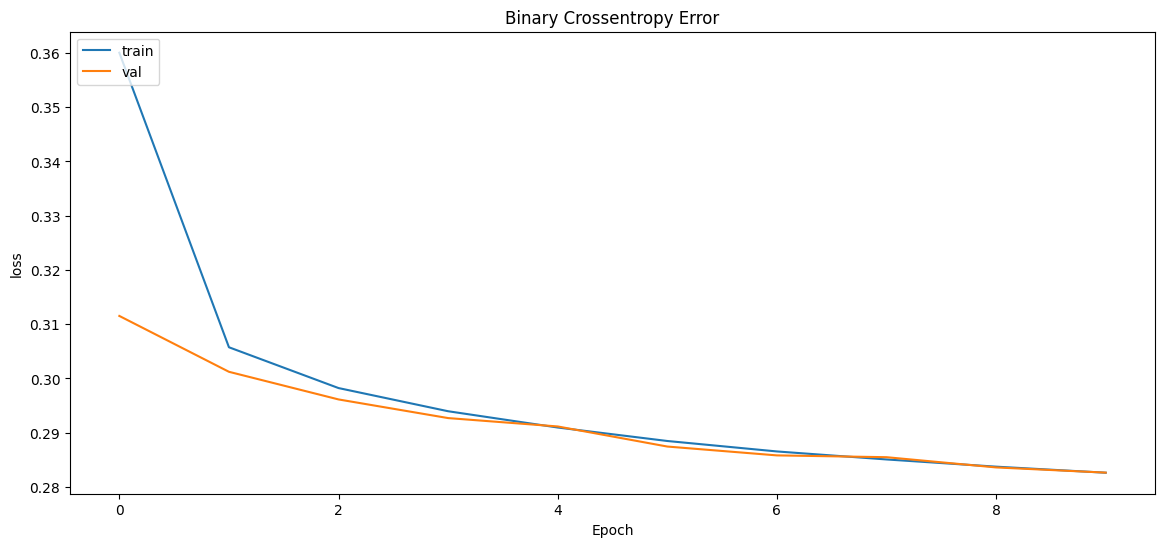

In [ ]:
# --- Plotting Training and Validation Loss ---
#plot the history performance scores
plt.figure(figsize=(14,6))
plt.plot(history.history[list(history.history.keys())[0]]) # Plot training loss
plt.plot(history.history[list(history.history.keys())[1]]) # Plot validation loss
plt.title('Binary Crossentropy Error')
plt.ylabel(list(history.history.keys())[0]) # Label y-axis with loss name
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left') # Add legend
plt.show()

# Reconstructing Test Images with the Stacked Autoencoder

This cell uses the trained Stacked Autoencoder (SAE) model to reconstruct the test images. The `predict()` method is used to generate the reconstructed images from the input test images. This allows for a comparison between the original and reconstructed images, providing insights into the autoencoder's ability to capture and reproduce the essential features of the data.

In [ ]:
# --- Reconstruct Test Images with the Stacked Autoencoder ---
# Encode and decode some digits through our SAE
# Note that we take them from the *test* set
restored_testing_dataset = SAE.predict(test_images.reshape(-1,(28*28)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Visualizing Original and Reconstructed Test Images

This cell visualizes a sample of the original test images and their corresponding reconstructions produced by the Stacked Autoencoder. It displays 10 images, one from each class, side-by-side with their reconstructed versions. This visual comparison helps to assess the quality of the reconstruction and the autoencoder's ability to preserve important image features.

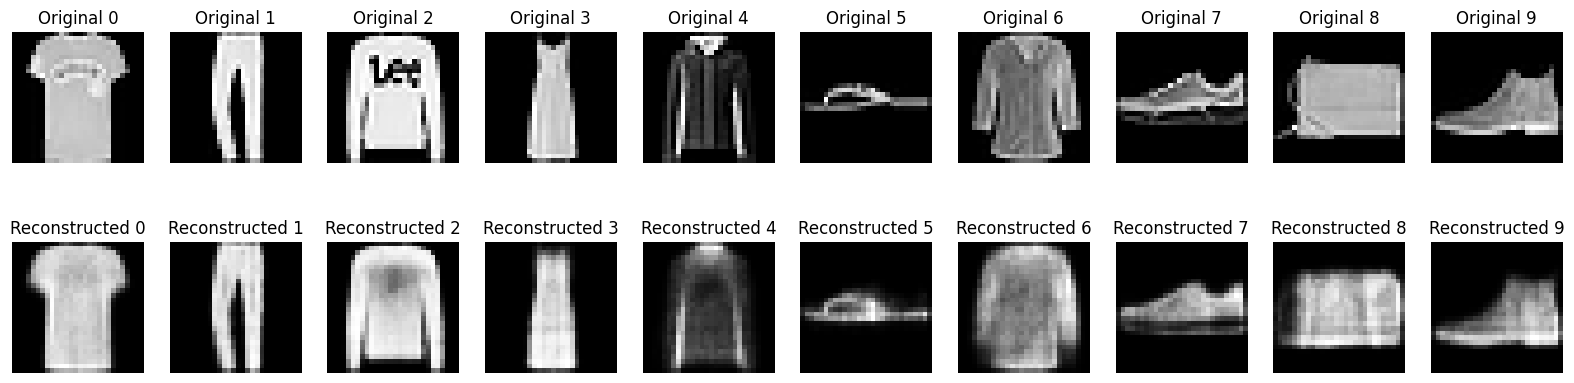

In [ ]:
# --- Visualize Original and Reconstructed Test Images ---
plt.figure(figsize=(20,5))
for i in range(10): # Display 10 images (one from each class)
    index = test_labels.tolist().index(i) # Find the first index of class i in test_labels

    # Display original image
    plt.subplot(2, 10, i+1)
    plt.imshow(test_images[index].reshape((28,28)), cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')

    # Display reconstructed image
    plt.subplot(2, 10, i+11)
    plt.imshow(restored_testing_dataset[index].reshape((28,28)), cmap='gray')
    plt.title(f"Reconstructed {i}")
    plt.axis('off')

plt.show()

# Visualizing the Latent Space of the Stacked Autoencoder

This cell extracts the encoder part from the trained Stacked Autoencoder model. The encoder is then used to transform the flattened training and test images into their lower-dimensional (32-dimensional) latent representations. These latent representations will be used as input for clustering algorithms in subsequent steps.

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of train images after SAE Encoder (Latent Space): (48000, 32)
Shape of test images after SAE Encoder (Latent Space): (10000, 32)


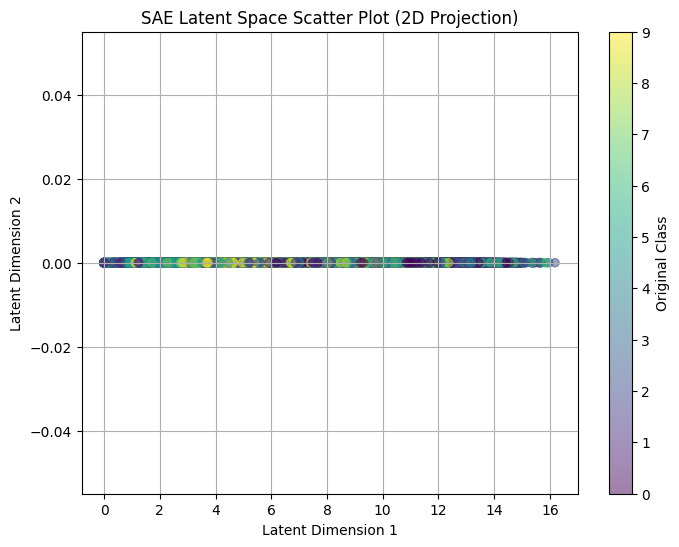

In [ ]:
# --- Extract Encoder and Create Latent Representations ---

# Define the Encoder model
# The encoder model takes the original input and outputs the activation of the bottleneck layer
# Make sure to use the correct layer name based on your specific SAE model instance layers!
# You can find the correct name by inspecting SAE.summary() or the error message layer list.
encoder = ks.Model(inputs=SAE.input, outputs=SAE.get_layer('dense_2').output)

# Create latent representations for training and test data using the encoder
# We use the flattened original images as input to the encoder
train_images_latent = encoder.predict(train_images_flat) # Use train_images_flat as input
test_images_latent = encoder.predict(test_images_flat)   # Use test_images_flat as input

# Print shapes to verify the latent space dimensionality
print(f"Shape of train images after SAE Encoder (Latent Space): {train_images_latent.shape}")
print(f"Shape of test images after SAE Encoder (Latent Space): {test_images_latent.shape}")

# Optional: Visualize the latent space scatter plot here (This plot is requested by the assignment in step 5 for DR)
plt.figure(figsize=(8, 6))
plt.scatter(train_images_latent[:, 0], train_images_latent[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.title('SAE Latent Space Scatter Plot (2D Projection)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.colorbar(label='Original Class')
plt.grid(True)
plt.show()

# Clustering on Latent Representations from Stacked Autoencoder

This cell performs clustering on the latent representations extracted from the Stacked Autoencoder using Mini-Batch K-Means and Gaussian Mixture Model (GMM). It first fits the models on the latent training data and then predicts the cluster labels for the latent test data. The execution time for each clustering algorithm and the clustering performance metrics (Calinski-Harabasz index, Davies-Bouldin index, and Silhouette score) are calculated and printed.

In [ ]:
# --- Clustering on SAE Latent Representations ---

# Mini-Batch K-means Clustering on SAE Latent Data
start_execution_mb_kmeans_sae = time.time() # Use a more specific variable name
mini_batch_kmeans_sae = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init=3) # Use a more specific variable name
# Fit and predict on the LATENT representations
mini_batch_kmeans_sae.fit(train_images_latent)
mini_batch_kmeans_sae_labels = mini_batch_kmeans_sae.predict(test_images_latent) # Predict on test data
end_execution_mb_kmeans_sae = time.time()
exec_time_mb_sae = end_execution_mb_kmeans_sae - start_execution_mb_kmeans_sae

# Evaluate Mini-Batch K-Means on SAE Latent Data
calinski_harabasz_mb_sae = calinski_harabasz_score(test_images_latent, mini_batch_kmeans_sae_labels)
davies_bouldin_mb_sae = davies_bouldin_score(test_images_latent, mini_batch_kmeans_sae_labels)
silhouette_mb_sae = silhouette_score(test_images_latent, mini_batch_kmeans_sae_labels)
num_clusters_mb_sae = len(set(mini_batch_kmeans_sae_labels))


# Gaussian Mixture Model (GMM) Clustering on SAE Latent Data
start_execution_gmm_sae = time.time() # Use a more specific variable name
gmm_sae = GaussianMixture(n_components=n_clusters, random_state=42) # Use a more specific variable name
# Fit and predict on the LATENT representations
gmm_sae.fit(train_images_latent)
gmm_sae_labels = gmm_sae.predict(test_images_latent) # Predict on test data
end_execution_gmm_sae = time.time()
exec_time_gmm_sae = end_execution_gmm_sae - start_execution_gmm_sae

# Evaluate GMM on SAE Latent Data
calinski_harabasz_gmm_sae = calinski_harabasz_score(test_images_latent, gmm_sae_labels)
davies_bouldin_gmm_sae = davies_bouldin_score(test_images_latent, gmm_sae_labels)
silhouette_gmm_sae = silhouette_score(test_images_latent, gmm_sae_labels)
num_clusters_gmm_sae = len(set(gmm_sae_labels))


# --- Print SAE Clustering Metrics (Optional but Recommended for Debug) ---
print("Mini-Batch K-means Metrics (SAE Latent):")
print(f"Execution Time: {exec_time_mb_sae} seconds")
print(f"Calinski-Harabasz index: {calinski_harabasz_mb_sae}")
print(f"Davies-Bouldin index: {davies_bouldin_mb_sae}")
print(f"Silhouette score: {silhouette_mb_sae}")
print(f"Number of Clusters: {num_clusters_mb_sae}")

print("\nGMM Metrics (SAE Latent):")
print(f"Execution Time: {exec_time_gmm_sae} seconds")
print(f"Calinski-Harabasz index: {calinski_harabasz_gmm_sae}")
print(f"Davies-Bouldin index: {davies_bouldin_gmm_sae}")
print(f"Silhouette score: {silhouette_gmm_sae}")
print(f"Number of Clusters: {num_clusters_gmm_sae}")

Mini-Batch K-means Metrics (SAE Latent):
Execution Time: 0.1142876148223877 seconds
Calinski-Harabasz index: 2613.573974609375
Davies-Bouldin index: 1.4984676417821703
Silhouette score: 0.2038383036851883
Number of Clusters: 10

GMM Metrics (SAE Latent):
Execution Time: 28.57333731651306 seconds
Calinski-Harabasz index: 1314.83837890625
Davies-Bouldin index: 2.4530828592889673
Silhouette score: 0.09973220527172089
Number of Clusters: 10


# Creating and Populating DataFrame with SAE Clustering Results

This cell creates Pandas DataFrame rows to store the evaluation metrics and timing information for the Mini-Batch K-Means and Gaussian Mixture Model (GMM) clustering algorithms when applied to the latent representations extracted from the Stacked Autoencoder (SAE). It retrieves the SAE training duration and the clustering execution times/metrics, stores them in dictionaries, and appends these dictionaries as rows to the main DataFrame for comparison with other dimensionality reduction techniques. Finally, it prints the complete DataFrame containing results from all combinations (Raw, PCA, SAE).

In [ ]:
# --- Populate DataFrame with SAE Clustering Results ---

# Store results for Mini-Batch K-means on SAE Latent Data
sae_row_mb_kmeans = {
    'Dimensionality reduction technique name': 'SAE',
    'Clustering algorithm': 'Mini-Batch K-means',
    'Training time for the dim. red. tech. in seconds': sae_training_duration, # Use the measured SAE training time
    'Execution time for the clustering tech. in seconds': exec_time_mb_sae,
    'Number of suggested clusters': num_clusters_mb_sae,
    'Calinski-Harabasz index': calinski_harabasz_mb_sae,
    'Davies-Bouldin index': davies_bouldin_mb_sae,
    'Silhouette score': silhouette_mb_sae
}
df.loc[len(df)] = sae_row_mb_kmeans

# Store results for GMM on SAE Latent Data
sae_row_gmm = {
    'Dimensionality reduction technique name': 'SAE',
    'Clustering algorithm': 'Gaussian Mixture',
    'Training time for the dim. red. tech. in seconds': sae_training_duration, # Use the measured SAE training time
    'Execution time for the clustering tech. in seconds': exec_time_gmm_sae,
    'Number of suggested clusters': num_clusters_gmm_sae,
    'Calinski-Harabasz index': calinski_harabasz_gmm_sae,
    'Davies-Bouldin index': davies_bouldin_gmm_sae,
    'Silhouette score': silhouette_gmm_sae
}
df.loc[len(df)] = sae_row_gmm

# --- Print the final updated DataFrame (includes Raw, PCA, SAE results) ---
print("Complete Results DataFrame:")
print(df)

# Ignore the FutureWarning related to concat with empty dataframes, it's fine for sequential execution

Complete Results DataFrame:
  Dimensionality reduction technique name Clustering algorithm  \
0                                     Raw   Mini-Batch K-means   
1                                     Raw                  GMM   
2                                     PCA   Mini-Batch K-means   
3                                     PCA     Gaussian Mixture   
4                                     SAE   Mini-Batch K-means   
5                                     SAE     Gaussian Mixture   

   Training time for the dim. red. tech. in seconds  \
0                                          0.000000   
1                                          0.000000   
2                                          1.986382   
3                                          1.986382   
4                                         66.400853   
5                                         66.400853   

   Execution time for the clustering tech. in seconds  \
0                                           2.502627    
1        

# Selecting Best Clustering and Displaying Cluster Images

This cell determines the best performing clustering algorithm (Mini-Batch K-Means on SAE Latent space) based on the evaluated metrics from the previous steps. It then displays a specified number of random images from two randomly selected clusters generated by this best performing algorithm. This visualization helps in understanding the characteristics and potential coherence of the clusters formed in the latent space.

Visualizing samples from clusters found by: SAE Latent + Mini-Batch K-Means (Best Clustering Quality)


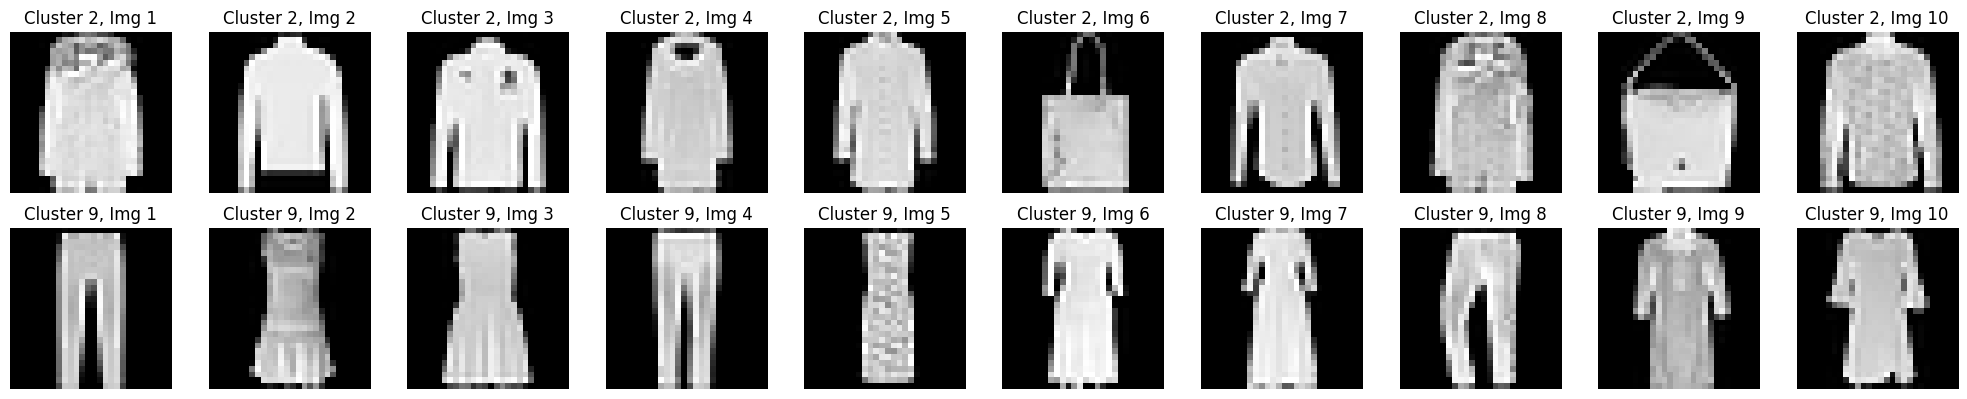

In [ ]:
def display_cluster_images(data, labels, num_clusters=10, images_per_cluster=10):
    """
    Displays random images from specified clusters.

    Args:
        data (numpy.ndarray): The image data.
        labels (numpy.ndarray): The cluster labels.
        num_clusters (int): The total number of clusters.
        images_per_cluster (int): Number of images to display per cluster.
    """

    # Select 2 random clusters
    selected_clusters = np.random.choice(num_clusters, 2, replace=False)

    plt.figure(figsize=(2 * images_per_cluster, 2 * len(selected_clusters) * 2))  # Adjust figure height

    for i, cluster in enumerate(selected_clusters):
        # Get indices of images in the current cluster
        cluster_indices = np.where(labels == cluster)[0]

        if len(cluster_indices) < images_per_cluster:
            print(f"Cluster {cluster} has fewer than {images_per_cluster} images. Skipping.")
            continue  # Skip this cluster if it has too few images

        # Select random images from the cluster
        random_indices = np.random.choice(cluster_indices, images_per_cluster, replace=False)

        for j, img_idx in enumerate(random_indices):
            plt.subplot(len(selected_clusters) * 2, images_per_cluster, i * images_per_cluster + j + 1)
            plt.imshow(data[img_idx].reshape(28, 28), cmap='gray')
            plt.axis('off')
            plt.title(f"Cluster {cluster}, Img {j+1}")
    plt.tight_layout()
    plt.show()

# --- Select Best Clustering and Display Images ---

# Select the cluster labels from the best performing combination (SAE Latent + Mini-Batch K-Means)
best_labels_for_visualization = mini_batch_kmeans_sae_labels # Use the labels from SAE Latent + Mini-Batch K-Means

# Print a message indicating which combination is being visualized
print("Visualizing samples from clusters found by: SAE Latent + Mini-Batch K-Means (Best Clustering Quality)")

# Display images from the clusters using the ORIGINAL flattened test images
# The display function expects flattened data and reshapes it for plotting
display_cluster_images(test_images, best_labels_for_visualization)